## Delivery service users segmentation

### Project description

For analysis, a dataset is used, in which every row represents one customer who has registered to use
the delivery service during September 2019 and either has or hasn’t made orders during the time from
then and October 2020.

The goal of this work is to segment users, which will help to better understand their behavior and select tools for further interaction with them.

To determine the segmentation method let's first look at the data.

 ###  Importing and first look at data and its preprocessing:

In [1]:
import pandas as pd
from datetime import datetime, timedelta, time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify
import warnings

/opt/miniconda3/envs/analytics/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#hide warnings
warnings.filterwarnings('ignore')

In [3]:
#display all columns
pd.set_option('display.max_columns', None)

In [4]:
users_data = pd.read_csv('../data/delivery_service_orders.csv')

#what data type we have
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

In [5]:
users_data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [6]:
users_data.tail()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,1.0,0.0,0.0,26.312,1.0,26.364,26.416,26.312,android,0.0,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21979,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21981,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21982,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2019-10-01 00:00:00.000,2019-10-01 00:00:00.000,21983,0.0,1.0,0.0,0.0,0.0,6.072,1.0,6.084,6.096,6.072,web,0.0,1.0,0.0,NaN,True,1.0,5.0,NaN,NaN,3.973,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [7]:
#convert the column names to lowercase
users_data.columns = users_data.columns.str.lower()
users_data.head(1)

,registration_date,registration_country,purchase_count,purchase_count_delivery,purchase_count_takeaway,first_purchase_day,last_purchase_day,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,preferred_device,ios_purchases,web_purchases,android_purchases,preferred_restaurant_types,user_has_valid_payment_method,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms,purchase_count_by_store_type
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [8]:
#summary statistics
users_data.describe()

,purchase_count,purchase_count_delivery,purchase_count_takeaway,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,ios_purchases,web_purchases,android_purchases,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,3.319671,24.428312,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,3.766418,18.914771,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,1.000000,0.000000,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,1.000000,14.196000,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,2.000000,19.266000,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,4.000000,29.406000,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,71.000000,659.100000,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [9]:
#checking for duplicates in a dataset
users_data.duplicated().sum()

0

In [10]:
#data with missing values
users_data.isna().sum()

registration_date                              0
registration_country                           0
purchase_count                                 0
purchase_count_delivery                     9955
purchase_count_takeaway                     9955
first_purchase_day                         10019
last_purchase_day                           9956
user_id                                        0
breakfast_purchases                         9955
lunch_purchases                             9955
evening_purchases                           9955
dinner_purchases                            9955
late_night_purchases                        9955
total_purchases_eur                         9955
distinct_purchase_venue_count               9955
min_purchase_value_eur                      9955
max_purchase_value_eur                      9955
avg_purchase_value_eur                      9955
preferred_device                              73
ios_purchases                               9955
web_purchases       

In [11]:
users_data.query('first_purchase_day.isna() and purchase_count==0').describe()

,purchase_count,purchase_count_delivery,purchase_count_takeaway,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,ios_purchases,web_purchases,android_purchases,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms
count,9955.0,0.0,0.0,9955.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,NaN,NaN,10938.675741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,6300.638315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,NaN,NaN,5464.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,NaN,NaN,10907.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,NaN,NaN,16428.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.0,NaN,NaN,21982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are no duplicates in the dataset, however, there are users who have not made a single purchase during the specified period, or the date of the first order is not specified for them.

Let's see if these are all users without purchases or if there was a 'failure' and the date of the first order was not saved.

In [12]:
users_data.query('first_purchase_day.isna() and purchase_count > 0').describe()

,purchase_count,purchase_count_delivery,purchase_count_takeaway,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,ios_purchases,web_purchases,android_purchases,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms
count,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0000,64.000000,64.000000,27.000000,27.000000,64.000000
mean,2.953125,2.640625,0.31250,11181.140625,0.093750,0.906250,0.140625,1.812500,0.0,127.195750,2.421875,43.047469,60.229750,49.872625,1.343750,0.921875,0.6875,11.593750,3.875000,63.888889,56.481481,4.726313
std,3.644651,3.030884,1.12511,7148.432262,0.293785,1.365316,0.499752,3.064777,0.0,183.732245,2.882926,80.155173,81.197805,79.265329,2.234071,2.756261,1.5000,7.431633,1.931362,83.662938,86.846182,3.410646
min,1.000000,0.000000,0.00000,152.000000,0.000000,0.000000,0.000000,0.000000,0.0,15.180000,1.000000,9.126000,15.240000,13.156000,0.000000,0.000000,0.0000,0.000000,1.000000,0.000000,0.000000,0.005000
25%,1.000000,1.000000,0.00000,4856.000000,0.000000,0.000000,0.000000,0.000000,0.0,39.974000,1.000000,20.280000,28.448000,26.059000,0.000000,0.000000,0.0000,4.000000,2.000000,24.000000,9.000000,1.855750
50%,2.000000,2.000000,0.00000,9982.000000,0.000000,0.000000,0.000000,1.000000,0.0,65.780000,1.000000,29.913000,45.720000,38.456000,1.000000,0.000000,0.0000,12.000000,4.000000,33.000000,25.000000,3.872500
75%,3.000000,3.000000,0.00000,17816.750000,0.000000,1.000000,0.000000,2.000000,0.0,122.958000,2.000000,43.602000,67.310000,50.600000,2.000000,1.000000,0.2500,18.250000,6.000000,59.000000,50.500000,7.084000
max,20.000000,14.000000,8.00000,21452.000000,1.000000,7.000000,3.000000,20.000000,0.0,1170.884000,13.000000,659.100000,660.400000,657.800000,14.000000,20.000000,8.0000,23.000000,7.000000,375.000000,375.000000,11.437000


For 64 users who made a purchase, the date of the first order is not indicated.

Since for analysis we will use the data of only active users or those who have made at least one purchase during the specified period, we will remove those who have not made a single order, as well as those for whom the date of the first order is not indicated, since this information is important to us.

In [13]:
#only active users or with min 1 purchase
active_users = users_data.query('purchase_count > 0 and first_purchase_day.notna()')
active_users.describe()

,purchase_count,purchase_count_delivery,purchase_count_takeaway,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,ios_purchases,web_purchases,android_purchases,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms
count,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.0,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,7805.000000,7805.000000,11964.000000
mean,6.131060,5.758275,0.372785,11035.358241,0.194500,2.382899,0.495319,3.035523,0.0,176.472618,3.324473,24.328711,41.970889,31.095146,2.908810,1.057255,2.164995,11.501505,4.011117,64.294939,55.789750,5.967824
std,10.786083,10.559627,1.417737,6379.374140,1.106787,5.639309,1.832051,5.246733,0.0,299.567834,3.770105,17.999533,40.841852,19.912487,7.473576,4.785002,6.892981,6.928390,2.010537,72.534959,74.925391,3.465516
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,1.000000,0.000000,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,1.000000,1.000000,0.000000,5534.750000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,1.000000,14.196000,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.963750
50%,3.000000,2.000000,0.000000,11039.500000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,2.000000,19.266000,35.560000,27.324000,0.000000,0.000000,0.000000,11.000000,4.000000,40.000000,25.000000,5.940500
75%,7.000000,6.000000,0.000000,16511.250000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,4.000000,29.406000,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,69.000000,8.981250
max,320.000000,320.000000,44.000000,21983.000000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,71.000000,338.676000,3048.000000,569.756000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [14]:
active_users.isna().sum()

registration_date                             0
registration_country                          0
purchase_count                                0
purchase_count_delivery                       0
purchase_count_takeaway                       0
first_purchase_day                            0
last_purchase_day                             0
user_id                                       0
breakfast_purchases                           0
lunch_purchases                               0
evening_purchases                             0
dinner_purchases                              0
late_night_purchases                          0
total_purchases_eur                           0
distinct_purchase_venue_count                 0
min_purchase_value_eur                        0
max_purchase_value_eur                        0
avg_purchase_value_eur                        0
preferred_device                              1
ios_purchases                                 0
web_purchases                           

There are still missing values in the dataset in some fields. 

For example, for some reason, users do not always indicate their preferences in cuisine. Either they just skip this step during the sign up, or they want to do it later but forget. Or they don't have any special preferences for cuisines.

In [15]:
active_users.query('preferred_device.isna()')

,registration_date,registration_country,purchase_count,purchase_count_delivery,purchase_count_takeaway,first_purchase_day,last_purchase_day,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,preferred_device,ios_purchases,web_purchases,android_purchases,preferred_restaurant_types,user_has_valid_payment_method,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms,purchase_count_by_store_type
20972,2019-09-29 00:00:00.000,FIN,1,1.0,0.0,2019-09-29 00:00:00.000,2019-09-29 00:00:00.000,20973,0.0,1.0,0.0,0.0,0.0,23.276,1.0,23.322,23.368,23.276,NaN,0.0,1.0,0.0,NaN,True,0.0,1.0,NaN,NaN,6.627,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


One user does not have a preferred device type, but we can see that he made one single browser order on the day he registered. The user haven't done any other purchases. Perhaps that's why the device type is not specified.

In [16]:
#preferred device type
active_users['preferred_device'].value_counts(normalize=True)

ios        0.442949
android    0.341971
web        0.215080
Name: preferred_device, dtype: float64

~45% of the total number of users are ios users, 34% android and 21% place an order through the browser. 

In [17]:
active_users.query('avg_days_between_purchases.isna()').describe()

,purchase_count,purchase_count_delivery,purchase_count_takeaway,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,ios_purchases,web_purchases,android_purchases,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms
count,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.0,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,0.0,0.0,4159.000000
mean,1.002164,0.928589,0.073575,10826.855254,0.028853,0.359461,0.091849,0.515989,0.0,31.869362,1.001683,31.819705,31.919354,31.774951,0.430392,0.239240,0.332532,11.424621,4.009618,NaN,NaN,5.998288
std,0.046474,0.265813,0.261110,6481.724346,0.167414,0.479900,0.288847,0.501725,0.0,24.500487,0.040996,24.332302,24.426047,24.295141,0.497613,0.427797,0.471687,6.919243,2.006700,NaN,NaN,3.450865
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,1.000000,1.014000,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.003000
25%,1.000000,1.000000,0.000000,5033.500000,0.000000,0.000000,0.000000,0.000000,0.0,17.204000,1.000000,17.238000,17.272000,17.204000,0.000000,0.000000,0.000000,5.000000,2.000000,NaN,NaN,3.003500
50%,1.000000,1.000000,0.000000,10645.000000,0.000000,0.000000,0.000000,1.000000,0.0,26.312000,1.000000,26.364000,26.416000,26.312000,0.000000,0.000000,0.000000,11.000000,4.000000,NaN,NaN,6.024000
75%,1.000000,1.000000,0.000000,16555.000000,0.000000,1.000000,0.000000,1.000000,0.0,39.468000,1.000000,39.546000,39.624000,39.468000,1.000000,0.000000,1.000000,17.000000,6.000000,NaN,NaN,9.008500
max,2.000000,2.000000,1.000000,21983.000000,1.000000,1.000000,1.000000,2.000000,0.0,338.008000,2.000000,338.676000,339.344000,338.008000,2.000000,2.000000,2.000000,23.000000,7.000000,NaN,NaN,11.999000


Not all users have an average number of days between orders. This may be due to the fact that each of these users made only one, maximum two orders.

**From which countries are there users in the dataset and their number:**

In [18]:
#check the number of users by country
active_users['registration_country'].value_counts()

FIN    5436
DNK    4938
GRC    1530
NOR      13
EST      13
HUN       5
CZE       4
SWE       4
POL       4
ISR       3
LVA       3
GBR       2
FRA       2
LTU       2
CAN       1
DEU       1
HRV       1
CYP       1
ARE       1
Name: registration_country, dtype: int64

The main part of users lives in Finland, Denmark and Greece.

There may be several reasons why the number of users is minimal in other countries:
- The service has just started working,
- There are other strong competitors,
- The service is not available in some countries (for example, in Canada, AEU, France or Great Britain).

**How orders and the total spendings are distributed for these three countries:**

In [19]:
main_countries = active_users.query('registration_country.isin(["FIN", "GRC", "DNK"])')

In [20]:
main_countries.describe()

,purchase_count,purchase_count_delivery,purchase_count_takeaway,user_id,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur,distinct_purchase_venue_count,min_purchase_value_eur,max_purchase_value_eur,avg_purchase_value_eur,ios_purchases,web_purchases,android_purchases,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms
count,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.0,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,11904.000000,7761.000000,7761.000000,11904.000000
mean,6.136341,5.763945,0.372396,11037.065776,0.194892,2.383989,0.494540,3.040491,0.0,176.748724,3.324177,24.340344,41.993045,31.107778,2.907846,1.061240,2.167255,11.500084,4.010249,64.335910,55.825538,5.970885
std,10.802099,10.575225,1.419022,6379.091354,1.109249,5.648530,1.833983,5.254943,0.0,300.107683,3.773250,17.990387,40.915147,19.916428,7.477474,4.796474,6.905892,6.931864,2.011200,72.565041,74.951941,3.464478
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,1.000000,0.000000,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,1.000000,1.000000,0.000000,5536.750000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,1.000000,14.196000,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.964750
50%,3.000000,2.000000,0.000000,11043.000000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,2.000000,19.266000,35.560000,27.324000,0.000000,0.000000,0.000000,12.000000,4.000000,40.000000,25.000000,5.945500
75%,7.000000,6.000000,0.000000,16511.250000,0.000000,2.000000,0.000000,3.000000,0.0,197.340000,4.000000,29.406000,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.000000,8.982500
max,320.000000,320.000000,44.000000,21983.000000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,71.000000,338.676000,3048.000000,569.756000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


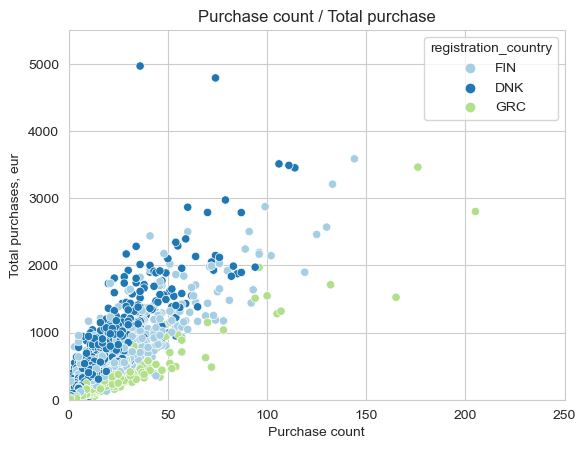

In [21]:
sns.set_style('whitegrid')
sns.scatterplot(data=main_countries,
            x='purchase_count',
            y='total_purchases_eur',
            hue='registration_country',
            palette='Paired')

plt.xlim(0,250)
plt.ylim(0,5500)
plt.title('Purchase count / Total purchase', fontsize = 12)
plt.ylabel('Total purchases, eur', fontsize = 10)
plt.xlabel('Purchase count', fontsize = 10)
plt.show()

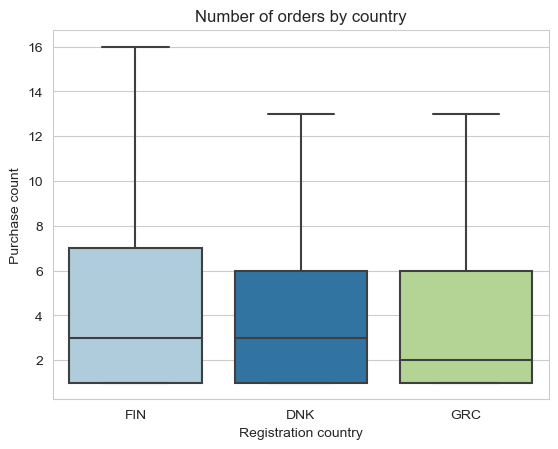

In [22]:
sns.boxplot(data=main_countries,
            x='registration_country',
            y='purchase_count',
            showfliers=False,
            palette='Paired')

plt.title('Number of orders by country', fontsize = 12)
plt.xlabel('Registration country', fontsize = 10)
plt.ylabel('Purchase count', fontsize = 10)
plt.show()

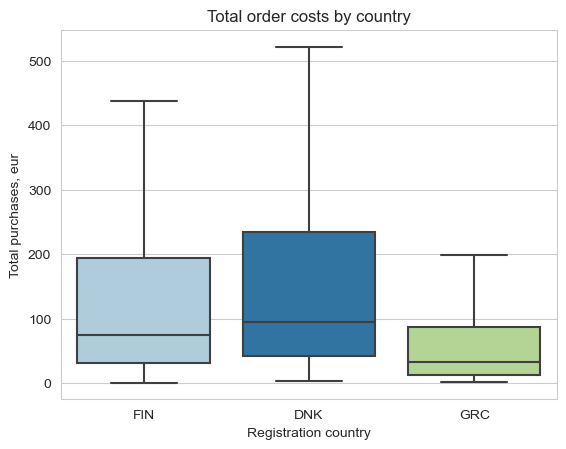

In [23]:
sns.boxplot(data=main_countries,
            x='registration_country',
            y='total_purchases_eur',
            showfliers=False,
            palette='Paired')

plt.title('Total order costs by country', fontsize = 12)
plt.xlabel('Registration country', fontsize = 10)
plt.ylabel('Total purchases, eur', fontsize = 10)
plt.show()

A typical user in Greece makes 2 orders, in Finland and Denmark 3 orders.

At the same time, the cost of an order in Denmark is higher than, for example, in Finland.
This may depend on various reasons, including the cost of living in each country.

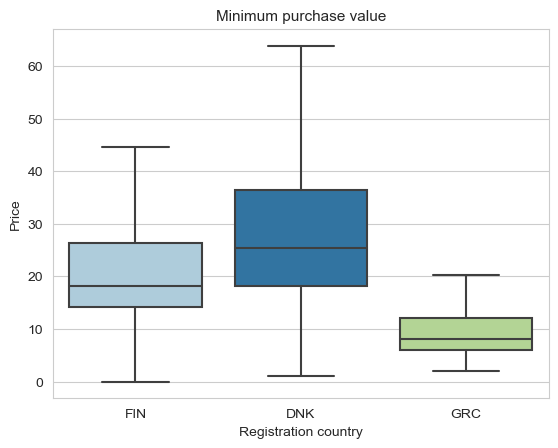

In [24]:
sns.boxplot(data=main_countries,
            x='registration_country',
            y='min_purchase_value_eur',
            showfliers=False,
            palette='Paired')

plt.title('Minimum purchase value', fontsize = 11)
plt.xlabel('Registration country', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.show()

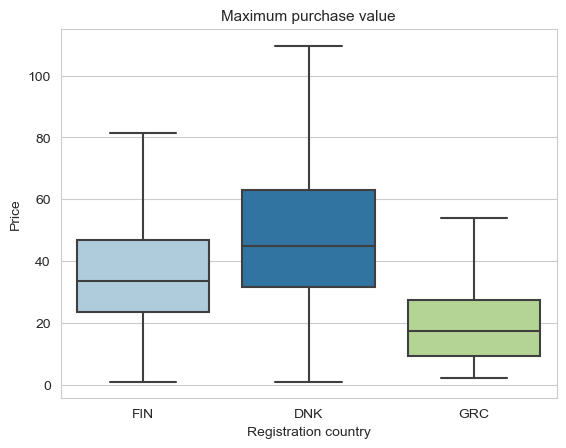

In [25]:
sns.boxplot(data=main_countries,
            x='registration_country',
            y='max_purchase_value_eur',
            showfliers=False,
            palette='Paired')

plt.title('Maximum purchase value', fontsize = 11)
plt.xlabel('Registration country', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.show()

Indeed, the cost of ordering in Denmark is higher than in Finland or Greece.
For Finland purchase value is between 19 and 45 euros. In Greece between 7 and 25 euros. In Denmark between 27 and 63 euros.

**How the amount of orders differs by store type:**

At first, using the eval function, we convert the number of orders by type of store into a tabular form.

In [26]:
store_type = main_countries['purchase_count_by_store_type'].apply(eval).apply(pd.Series)
store_type.head()

,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
1,0,0,0,1,0
2,1,9,0,9,0
7,0,0,0,1,0
12,1,9,0,9,0
13,0,0,0,2,0


In [27]:
#add user id and country
by_store_type = main_countries[['user_id', 'registration_country']].join(store_type)

#rename columns
by_store_type = by_store_type.rename(columns = {'General merchandise':'general_merchandise',
                                                'Grocery':'grocery','Pet supplies':'pet_supplies',
                                               'Restaurant':'restaurant', 'Retail store':'retail_store'})
by_store_type.head()

,user_id,registration_country,general_merchandise,grocery,pet_supplies,restaurant,retail_store
1,2,FIN,0,0,0,1,0
2,3,DNK,1,9,0,9,0
7,8,FIN,0,0,0,1,0
12,13,FIN,1,9,0,9,0
13,14,FIN,0,0,0,2,0


In [28]:
#change the dataframe format from wide to long to build barplot
main_countries_store_type = by_store_type.melt(id_vars=['registration_country','user_id'],
                   var_name='store_type',value_name='purchases')
main_countries_store_type.head()

,registration_country,user_id,store_type,purchases
0,FIN,2,general_merchandise,0
1,DNK,3,general_merchandise,1
2,FIN,8,general_merchandise,0
3,FIN,13,general_merchandise,1
4,FIN,14,general_merchandise,0


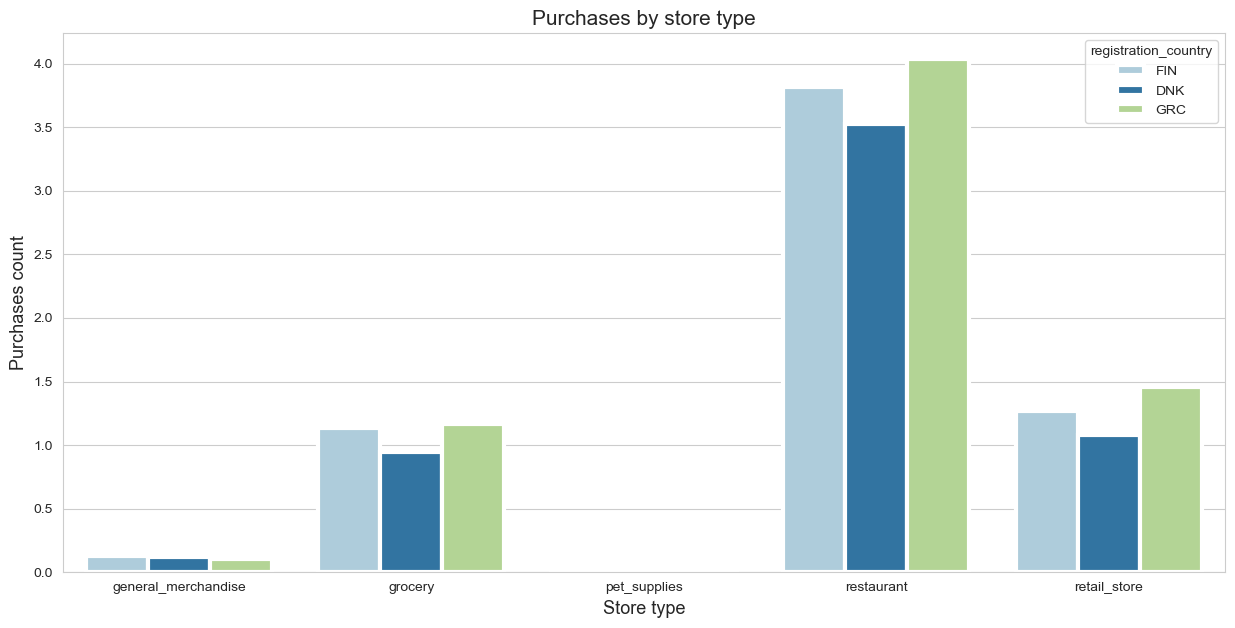

In [29]:
fig = plt.figure(figsize=(15,7))

sns.barplot(x = main_countries_store_type['store_type'],
            y = main_countries_store_type['purchases'],
            hue = main_countries_store_type['registration_country'],
            ci = False,
            lw=3,
            palette='Paired')

plt.title('Purchases by store type', fontsize = 15)
plt.xlabel('Store type', fontsize = 13)
plt.ylabel('Purchases count', fontsize = 13)
plt.show()

The amount of orders in different store types doesn't differ much between countries.


Because this data is machine generated, that's probably why it looks the same for different dimensions.
For example, I've noticed that for users who made a purchase both in a restaurant and in a grocery store, the data is the same.

In [30]:
by_store_type.query('grocery == restaurant').describe()

,user_id,general_merchandise,grocery,pet_supplies,restaurant,retail_store
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.0
mean,11114.353454,0.892346,7.863721,0.107654,7.863721,0.0
std,6309.080872,0.310039,7.883774,0.310039,7.883774,0.0
min,3.000000,0.000000,3.000000,0.000000,3.000000,0.0
25%,5602.500000,1.000000,4.000000,0.000000,4.000000,0.0
50%,11523.000000,1.000000,5.000000,0.000000,5.000000,0.0
75%,16332.500000,1.000000,9.000000,0.000000,9.000000,0.0
max,21972.000000,1.000000,110.000000,1.000000,110.000000,0.0


**How quickly users start using the service, let's calculate their life time:**

In [31]:
#Convert the data to the needed data type:
active_users['registration_date'] = pd.to_datetime(active_users['registration_date'])
active_users['first_purchase_day'] = pd.to_datetime(active_users['first_purchase_day'])
active_users['last_purchase_day'] = pd.to_datetime(active_users['last_purchase_day'])

In [32]:
#Set the last date in the dataset as the current date
NOW = datetime(2020,10,31)

In [33]:
#life time
active_users['life_time'] = (NOW - active_users['first_purchase_day'])/np.timedelta64( 1 , 'D')

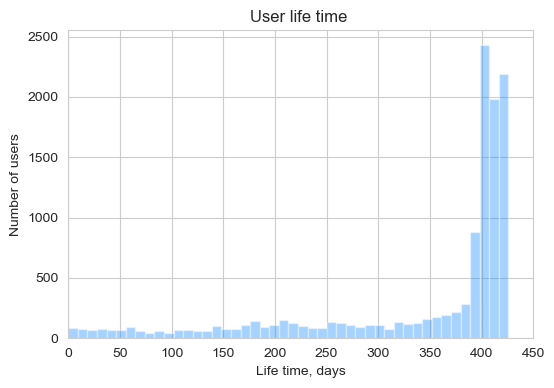

In [34]:
fig = plt.figure(figsize=(6,4))
sns.distplot(active_users['life_time'], color = 'dodgerblue', kde = False)

plt.xlim(0,450)
plt.title('User life time ', fontsize = 12)
plt.xlabel('Life time, days', fontsize = 10)
plt.ylabel('Number of users', fontsize = 10)
plt.show()

Most of the clients start using the service in the first days after registration.

**Percentage of users have valid payment method:**

In [35]:
main_countries['user_has_valid_payment_method'].value_counts(normalize=True)

True     0.591398
False    0.408602
Name: user_has_valid_payment_method, dtype: float64

Only 60% of users have a valid payment method.

At the moment, there is not enough information to say why exactly 40% of users do not have a valid payment method.
Since there is no information on how exactly this field is formed and what True means in this case, is it a credit card linked to the account or there are some other conditions.

### Summarizing all of the above:

- We have already determined what data will be used for analysis. This is information about users who have made at least one purchase and for whom the registration dates and the dates of the first and last purchases are indicated.
- The main part of users are concentrated in three countries - Finland, Denmark, Greece.
- Most of them start using the service in the first days after registration.
- The average number of orders per user doesn't vary much across countries, but the cost of the order in Denmark is higher than in other countries. It varies from 20 to 60 euros in Denmark.
- The same with orders by store type - about the same number of purchases for all countries.
- 40% of users do not have a valid payment method.
- 45% of the total number of users are ios users, 34% android and 21% place an order through the browser.  


After reviewing the data, I would choose the **RFM method** as a method of segmentation.

The RFM method evaluates how long ago customers made a purchase, how often they make purchases, and how much money they spend.

Such segmentation allows to identify high-value customers who are already actively using the service, as well as a group of users who use it from time to time. And what can be done to keep current users and reactivate those who for some reason have stopped using the service.

### RFM:

**What does RFM method mean?**

The RFM model is based on three factors:
- Recency: how recently a customer has made a purchase,
- Frequency: how often a customer makes a purchase,
- Monetary value: how much money a customer spends on purchases.


The goals can be different - defining the target audience, increasing engagement and loyalty, reducing customer churn, etc.

The RFM analysis ranks clients numerically in each of these three categories, on a scale of 1 to 4 or 5 - the higher the number, the better the result.

To rank users, we will divide the data into quartiles - 0.25, 0.50, 0.75. Accordingly, the maximum score will be 4.

 - To segment users, we need information about the recentness of purchases, their frequency and total spend.

In [36]:
#only needed columns
rfm_data = active_users[['user_id', 'purchase_count','total_purchases_eur']].copy()

In [37]:
#calculate recency
rfm_data['recency'] = (NOW - active_users['last_purchase_day'])/np.timedelta64( 1 , 'D')
rfm_data.head()

,user_id,purchase_count,total_purchases_eur,recency
1,2,1,38.456,59.0
2,3,19,631.488,159.0
7,8,1,19.228,17.0
12,13,19,587.972,4.0
13,14,2,118.404,52.0


In [38]:
#rename columns
rfm_data = rfm_data.rename(columns = {'purchase_count':'frequency', 'total_purchases_eur':'monetary_value'})

#change order of columns by name
rfm_data = rfm_data.reindex(columns=['user_id', 'recency', 'frequency', 'monetary_value'])
rfm_data = rfm_data.set_index('user_id')
rfm_data.head()

,recency,frequency,monetary_value
user_id,,,
2,59.0,1,38.456
3,159.0,19,631.488
8,17.0,1,19.228
13,4.0,19,587.972
14,52.0,2,118.404


In [39]:
#divide the data into quartiles
quantiles = rfm_data.quantile(q=[0.25, 0.50, 0.75])

#convert quantiles to a dictionary
quantiles = quantiles.to_dict()
rfm_segment = rfm_data.copy()

In [40]:
# arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Score(x,p,d):
     if x <= d[p][0.25]:
         return 4
     elif x <= d[p][0.50]:
         return 3
     elif x <= d[p][0.75]: 
         return 2
     else:
         return 1
        
def FM_Score(x,p,d):
     if x <= d[p][0.25]:
         return 1
     elif x <= d[p][0.50]:
         return 2
     elif x <= d[p][0.75]: 
         return 3
     else:
         return 4

#add new columns   
rfm_segment['r_quartile'] = rfm_segment['recency'].apply(R_Score, args=('recency',quantiles,))
rfm_segment['f_quartile'] = rfm_segment['frequency'].apply(FM_Score, args=('frequency',quantiles,))
rfm_segment['m_quartile'] = rfm_segment['monetary_value'].apply(FM_Score, args=('monetary_value',quantiles,))
rfm_segment['RFM_Score'] = rfm_segment.r_quartile.map(str) + rfm_segment.f_quartile.map(str) + rfm_segment.m_quartile.map(str)

rfm_segment.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
2,59.0,1,38.456,3,1,2,312
3,159.0,19,631.488,3,4,4,344
8,17.0,1,19.228,4,1,1,411
13,4.0,19,587.972,4,4,4,444
14,52.0,2,118.404,3,2,3,323


In [41]:
#RFM_Score = 444
rfm_segment[rfm_segment['RFM_Score']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
17792,8.0,36,4965.884,4,4,4,444
17213,32.0,74,4788.784,4,4,4,444
18772,10.0,144,3584.504,4,4,4,444
9518,4.0,106,3509.616,4,4,4,444
18316,0.0,111,3487.352,4,4,4,444


In [42]:
rfm_segment[rfm_segment['RFM_Score']=='111'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
9968,413.0,1,32.384,1,1,1,111
18370,402.0,1,32.384,1,1,1,111
16165,405.0,1,32.384,1,1,1,111
10973,412.0,1,32.384,1,1,1,111
427,426.0,1,32.384,1,1,1,111


RFM score is determined for each user depending on how long ago he made purchases, how often and for what amount.
RFM score '444' means, that client has made a purchase recently, he buys a lot and spend a lot.
RFM score '111' means, that client made a purchase long time ago, he didn't buy a lot and didn't spend a lot.

To better understand which users are here, assign categories to users based on RFM score.

Categories might be:
- Best buyers - made a purchase recently, buy a lot and spend a lot.
- Loyal - have recency score 3 or 4 and frequency score 4. That is, they order recently and quite often.
- Potential loyal - these are new users who have only recently used the service and are just starting to buy (RFM score 411, 412 for example). And also those who use it from time to time.
- To reactivate (hold) - purchases were made a long time ago, but at the same time, some of the users used to buy often and spend a lot. For example, users with RFM score 144 and 244. 
- Potential lost - ordered a long time ago and not very often.
- Lost - just 1 or 2 purchases long time ago.

In [43]:
rfm_segment['RFM_Score'] = rfm_segment['RFM_Score'].astype(int)

In [44]:
def label_rfm_segments(RFM_Score):

    if (RFM_Score == 111):
        return 'Lost'

    elif ((RFM_Score >= 112) & (RFM_Score <= 143)):
        return 'Potential lost'    

    elif (RFM_Score >= 144) & (RFM_Score <= 244):
        return 'To reactivate (hold)'       

    elif ((RFM_Score >= 311) & (RFM_Score <= 334)) or ((RFM_Score >= 411) & (RFM_Score <= 434)):
        return 'Potential loyal' 

    elif ((RFM_Score >= 342) & (RFM_Score <= 344)) or ((RFM_Score >= 442) & (RFM_Score <= 443)):
        return 'Loyal'      

    else:
        return 'Best'

In [45]:
#aplly function
rfm_segment['rfm_segment_name'] = rfm_segment.apply(lambda x: label_rfm_segments(x.RFM_Score), axis=1)
rfm_segment.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM_Score,rfm_segment_name
user_id,,,,,,,,
2,59.0,1,38.456,3,1,2,312,Potential loyal
3,159.0,19,631.488,3,4,4,344,Loyal
8,17.0,1,19.228,4,1,1,411,Potential loyal
13,4.0,19,587.972,4,4,4,444,Best
14,52.0,2,118.404,3,2,3,323,Potential loyal


Let's group clients by categories, and also calculate the minimum and maximum values for each of the metrics.

In [46]:
rfm_segment.reset_index(inplace= True )

In [47]:
rfm_segment.groupby('rfm_segment_name').agg(customers=('user_id', 'count'),
                                            min_rfm=('RFM_Score', 'min'),
                                            max_rfm=('RFM_Score', 'max'),
                                            min_recency=('recency', 'min'),
                                            max_recency=('recency', 'max'),
                                            min_frequency=('frequency', 'min'),
                                            max_frequency=('frequency', 'max'),
                                            min_monetary=('monetary_value', 'min'),
                                            max_monetary=('monetary_value', 'max')).reset_index().sort_values(by='min_recency')

,rfm_segment_name,customers,min_rfm,max_rfm,min_recency,max_recency,min_frequency,max_frequency,min_monetary,max_monetary
0,Best,1446,444,444,0.0,34.0,8,205,197.340,4965.884
2,Loyal,907,342,443,0.0,162.0,8,221,53.636,7979.620
4,Potential loyal,3638,311,434,0.0,162.0,1,7,5.060,865.260
5,To reactivate (hold),2985,144,244,163.0,402.0,1,320,2.024,4335.408
1,Lost,1579,111,111,386.0,426.0,1,1,1.012,32.384
3,Potential lost,1409,112,143,386.0,426.0,1,9,7.084,475.640


For categories 'Loyal' and 'Potentional loyal' min_recency and max_recency are the same - between 0 and 162 days, but the frequency and the total expenses vary greatly.

Among the users of the 'To reactivate' category, there are those who really ordered often and spent a lot, but for some reason stopped using the service.  It is good to try to reactivate such users.

Categories 'Potentional lost' and 'Lost' also have the same min_recency and max_recency. Anaway, frequency and monetary are differ. 

By analyzing in more detail the users of each of the categories - when they make a purchase, what day and time, in which stores and restaurants, we can understand how to encourage them to use the service more often and buy more.

**Visualising the segments:**

In [48]:
rfm_treemap = rfm_segment.groupby('rfm_segment_name').agg(customers=('user_id', 'count')).reset_index()
rfm_treemap

,rfm_segment_name,customers
0,Best,1446
1,Lost,1579
2,Loyal,907
3,Potential lost,1409
4,Potential loyal,3638
5,To reactivate (hold),2985


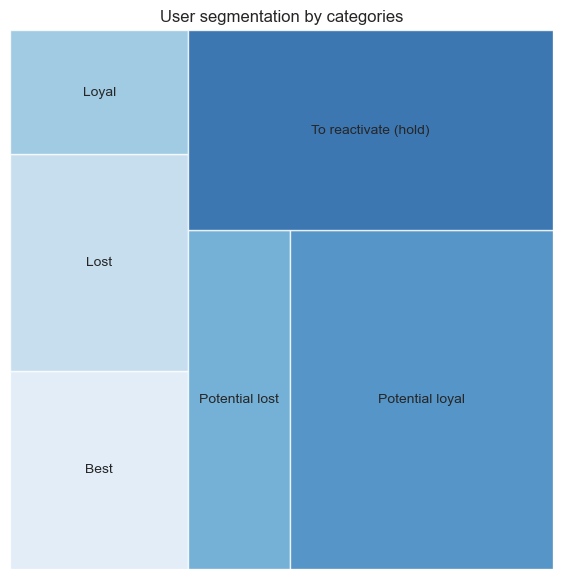

In [49]:
fig, ax = plt.subplots(1, figsize = (7,7))

squarify.plot(sizes=rfm_treemap['customers'], 
              label=rfm_treemap['rfm_segment_name'], 
              alpha=.8,
              color = sns.color_palette('Blues')
             )

plt.title('User segmentation by categories', fontsize = 12)             
plt.axis('off')
plt.show()

As you can see from the graph, Best and Loyal categories are not the largest. However, it can be increased by moving users from potentially loyal to loyal and best ones.

By analyzing what time of the day clients usually place an order, we can send a notification with a reminder to have lunch, for example, by this time.

Or studying the preferences in the cuisine and the restaurants where users order food, it is possible for users with similar preferences to send recommendations of places from which they haven't ordered yet. Try to encourage them to try new places based on their preferences.

The same can be done with a group of users that we can try to reactivate.
We need to understand why they stopped using the service? Has anyone moved to another city or country? Or maybe they have moved to a more remote area from the city center, where many restaurants don't deliver orders.
Or maybe they ordered from the same restaurant, but it closed.

A more detailed analysis of user data can help in choosing how to interact with each of these categories of users. 

## Overall summary:

- The purpose of this project was user segmentation.

To achieve this goal, an initial data analysis was carried out, during which it turned out that the main share of users is located in Finland, Denmark and Greece. 

It is noteworthy that countries have approximately the same value in terms of the number of orders (there are no strong distortions in the data). However, the cost of the order is different. As mentioned above, this may be related to the price level in a particular country.

Also the amount of orders in different store types doesn't differ much between countries. They are all almost on the same level.

This may be because the data has been artificially created.


- Based on how recently, how often and how much users place orders and how much money they spend in the service, we segmented them using the RFM method. 
We have identified customers who actively use the service , who use it from time to time, and who have stopped using it altogether.

A rating was set for each client, where:
- RFM score 444 means that client has made a purchase recently, he buys a lot and spend a lot and has category 'Best users'.
- RFM score 111 means, that client made a purchase long time ago, he didn't buy a lot and didn't spend a lot. These users are categorized as 'Lost' users.

Users between these values are categorized as Loyal, Potential loyal, Reactivated and Potential lost users.

Percentage for each group:
- Best users - 12%
- Loyal	- 8%
- Potential loyal - 30%
- To reactivate (hold)	- 25%
- Potential lost	- 12% 
- Lost	- 13%

There is a large proportion of potentially loyal customers and those who can be reactivated.

- What can be done to keep best users buying more? How to convert users from potentially loyal to loyal? And how to reactivate those who stopped using the service?

It might be worth looking into similarities across user categories. For example, what is common between loyal and potentially loyal and how do they differ. 

The area where the user lives is also important. What restaurants are in the area? How do they relate to user preferences in the cuisine? What restaurants and shops deliver orders to this area?

A more detailed analysis of all categories of users, as well as an analysis of their behavior, will help find ways to interact with them.